<a href="https://colab.research.google.com/github/namnitha/CE888-Data-Science/blob/master/Project/Assignment2/ASSN2_Sberbank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "namnitha" # username from the json file
os.environ['KAGGLE_KEY'] = "90ceb5b09eaa184f556d4577eb017b49" # key from the json file
!kaggle competitions download -c sberbank-russian-housing-market

  0% 0.00/4.46M [00:00<?, ?B/s]
100% 4.46M/4.46M [00:00<00:00, 41.3MB/s]
  0% 0.00/18.6k [00:00<?, ?B/s]
100% 18.6k/18.6k [00:00<00:00, 19.0MB/s]
 53% 9.00M/17.1M [00:00<00:00, 32.4MB/s]
100% 17.1M/17.1M [00:00<00:00, 49.1MB/s]
  0% 0.00/66.5k [00:00<?, ?B/s]
100% 66.5k/66.5k [00:00<00:00, 69.2MB/s]
  0% 0.00/25.4k [00:00<?, ?B/s]
100% 25.4k/25.4k [00:00<00:00, 26.0MB/s]


In [4]:
from zipfile import ZipFile

file_name = "/content/test.csv.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

file_name = "/content/train.csv.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done
done


In [0]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import os
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [0]:
train = pd.read_csv('train.csv', low_memory=True)
test = pd.read_csv('test.csv', low_memory=True)

In [8]:
train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,240.0,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,...,639.68,1079.37,859.52,5,21,22,16,3,1,0,2,4,0,0,21,1,13.09,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.372602,0.049637,6880,3119.0,5,7759,6237.0,8,0,229.0,1,0,6,1,yes,1,3,0,no,no,no,no,no,no,no,...,631.03,1086.21,858.62,1,11,11,4,2,1,0,1,7,0,6,19,1,10.26,27.47,66,2690465,40,2034942,177,673.81,1148.81,911.31,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Tekstil'shhiki,4.808270e+06,101708,0.112560,0.118537,5879,1463.0,4,6207,5580.0,7,0,1183.0,1,0,5,1,no,0,0,1,no,no,no,yes,no,no,no,...,697.44,1192.31,944.87,2,9,17,9,3,1,0,0,11,0,0,20,6,13.69,21.58,43,1478160,35,1572990,122,702.68,1196.43,949.55,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Mitino,1.258354e+07,178473,0.194703,0.069753,13087,6839.0,9,13670,17063.0,10,0,NaN,1,0,17,6,no,0,11,4,no,no,no,no,no,no,no,...,718.75,1218.75,968.75,0,5,14,10,3,0,0,1,2,0,0,18,3,14.18,3.89,8,244166,22,942180,61,931.58,1552.63,1242.11,4,7,21,15,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Basmannoe,8.398461e+06,108171,0.015234,0.037316,5706,3240.0,7,6748,7770.0,9,0,562.0,4,2,25,2,no,0,10,93,no,no,no,yes,yes,no,no,...,853.03,1410.45,1131.74,63,266,267,262,149,57,4,70,121,1,40,77,5,8.38,10.92,689,8404624,114,3503058,2283,853.88,1411.45,1132.66,143,566,578,552,319,108,17,135,236,2,91,195,14,16331452


In [9]:
test.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,cafe_count_3000,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,30474,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,3.0,Investment,Juzhnoe Butovo,2.615514e+07,178264,0.137846,0.041116,14080,11926.0,11,14892,24750.0,13,1,NaN,1,0,13,4,no,0,4,4,no,no,no,no,no,no,no,...,12,781.82,1227.27,1004.55,1,2,2,7,0,0,0,1,3,1,0,7,0,21.58,4.69,1,37550,8,299166,19,676.47,1088.24,882.35,2,5,4,8,0,0,0,1,10,1,0,14,1
1,30475,2015-07-01,79.2,NaN,8,17,1,0.0,3,1.0,1.0,OwnerOccupier,Poselenie Vnukovskoe,2.553630e+07,4001,0.496315,0.007122,275,NaN,0,264,NaN,0,0,NaN,0,0,0,0,no,0,1,0,no,no,no,no,no,no,no,...,10,680.00,1200.00,940.00,0,1,6,2,1,0,0,1,5,0,0,7,0,39.10,7.70,2,177300,6,231300,20,733.33,1250.00,991.67,2,4,8,4,1,1,0,2,11,0,1,12,1
2,30476,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,2.0,Investment,Perovo,9.946335e+06,139322,0.065409,0.225825,6400,2232.0,7,6558,7966.0,7,0,1548.0,3,0,13,0,no,0,2,7,yes,no,yes,yes,no,no,no,...,37,608.33,1069.44,838.89,1,8,19,7,2,0,0,2,3,0,5,22,4,25.62,13.59,27,427889,26,1024431,179,668.97,1132.18,900.57,5,53,64,42,11,4,0,10,21,0,10,71,11
3,30477,2015-07-01,62.8,36.0,17,17,1,2016.0,2,62.8,3.0,OwnerOccupier,Poselenie Voskresenskoe,2.149409e+07,7122,0.262459,0.017647,489,NaN,0,469,NaN,0,0,NaN,0,0,0,2,no,0,0,0,no,no,no,no,no,no,no,...,1,300.00,500.00,400.00,0,1,0,0,0,0,0,0,4,0,0,0,0,24.25,1.66,0,0,0,0,5,1560.00,2500.00,2030.00,0,1,0,1,1,2,0,0,10,0,0,2,0
4,30478,2015-07-01,40.0,40.0,17,17,1,0.0,1,1.0,1.0,OwnerOccupier,Poselenie Vnukovskoe,2.553630e+07,4001,0.496315,0.007122,275,NaN,0,264,NaN,0,0,NaN,0,0,0,0,no,0,1,0,no,no,no,no,no,no,no,...,9,700.00,1222.22,961.11,0,1,5,2,1,0,0,1,4,0,0,6,0,35.62,6.96,1,117300,4,201300,20,747.37,1263.16,1005.26,1,4,8,5,1,1,0,2,12,0,1,11,1


In [10]:
print('train shape:', train.shape)
print('test shape:',test.shape)

train shape: (30471, 292)
test shape: (7662, 291)


Since train data has the original ‘target’ variable which is not present in test, we have to drop that variable too.


In [0]:
#dropping ‘target’ column as well because it is not present in the test
dum_train = train.drop(columns=['id', 'price_doc'], inplace=True)
dum_test = test.drop(columns=['id'], inplace=True)

In [0]:
#for handling missing values
for i in train.columns:
    if train[i].dtype == 'object':
      train[i] = train[i].fillna(train[i].mode().iloc[0])
    if (train[i].dtype == 'int' or train[i].dtype == 'float'):
      train[i] = train[i].fillna(np.mean(train[i]))


for i in test.columns:
    if test[i].dtype == 'object':
      test[i] = test[i].fillna(test[i].mode().iloc[0])
    if (test[i].dtype == 'int' or test[i].dtype == 'float'):
      test[i] = test[i].fillna(np.mean(test[i]))

## label encoding
number = LabelEncoder()
for i in train.columns:
    if (train[i].dtype == 'object'):
      train[i] = number.fit_transform(train[i].astype('str'))
      train[i] = train[i].astype('object')

for i in test.columns:
    if (test[i].dtype == 'object'):
      test[i] = number.fit_transform(test[i].astype('str'))
      test[i] = test[i].astype('object')

Plotting histograms for random columns in comparision with the train vs test colums



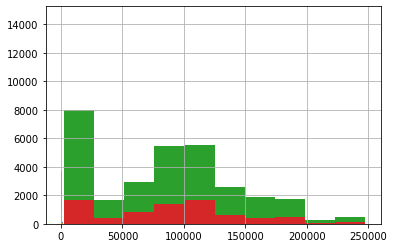

In [76]:
train['cafe_sum_3000_min_price_avg'].hist() 
test['cafe_sum_3000_min_price_avg'].hist()
train["raion_popul"].hist() 
test['raion_popul'].hist()
train["green_zone_part"].hist() 
test['green_zone_part'].hist()

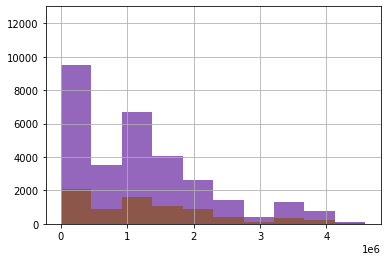

In [79]:
train["indust_part"].hist() 
test['indust_part'].hist()
train['children_preschool'].hist() 
test['children_preschool'].hist()
train["trc_sqm_5000"].hist() 
test['trc_sqm_5000'].hist()

##Indicator for source of origin
We have to add a feature ‘is_train’ in both train and test data. Value for this feature will be 0 for test and 1 for train.

In [0]:
#adding a column to identify whether a row comes from train or not
test['is_train'] = 1
train['is_train'] = 0 

In [14]:
from sklearn.model_selection import train_test_split
#combining test and train data
df_combine = train.append(test)
y = df_combine['is_train'].values #labels
X = df_combine.drop('is_train', axis=1).values #covariates or our independent variables

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)
print('set2 train shape:', X_train.shape, 'set2 test shape:', X_test.shape)

set2 train shape: (28599, 290) set2 test shape: (9534, 290)


In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)
print('set2 train shape:', X_train.shape, 'set2 test shape:', X_test.shape)

set2 train shape: (28599, 290) set2 test shape: (9534, 290)


In [16]:
print('y_test shape:', y_test.shape, 'y_train shape:', y_train.shape)

y_test shape: (9534,) y_train shape: (28599,)


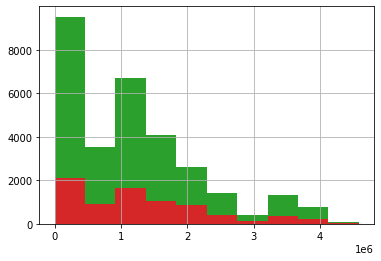

In [80]:
train['children_preschool'].hist() 
test['children_preschool'].hist()
train["trc_sqm_5000"].hist() 
test['trc_sqm_5000'].hist()

In [0]:
clf = RandomForestRegressor(n_estimators = 200, random_state = 42)
#predictions = np.zeros(y.shape) #creating an empty prediction array

In [18]:
clf.fit(X_train, y_train)
#probs_y_test = clf.predict(X_test) #calculating the predictions

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [0]:
probs_y_test = clf.predict(X_test) #calculating the predictions

In [42]:
from sklearn.metrics import roc_auc_score 
predictions = clf.predict(X_test)
##Calculating the training accuracy
#print('ROC-AUC for train and test distributions:', round(AUC(y_true=y_test, y_score=probs_y_test[:,1]), 4)
print("Accuracy score = ", clf.score(X_train, y_train))

Accuracy score =  0.99997887540907


This score shows that the data contains covariate shift.


#Covariate shift adaptation

In [0]:
from sklearn.model_selection import StratifiedKFold as SKF
from sklearn.metrics import roc_auc_score as AUC
from sklearn.svm import SVC

def getTrainWeights(train, test):
    test['is_train'] = 1
    train['is_train'] = 0
    
    combinedData = train.append(test)
    X = combinedData.drop(columns=['is_train'], axis=1)
    y = combinedData['is_train']
    
    clf = RandomForestClassifier()
    # clf = SVC(probability=True)
    predictions = np.zeros(y.shape)
    skf = SKF(n_splits=10, shuffle=True, random_state=888)

    for kfold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print('Training discriminator model for fold {}'.format(kfold))
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
            
        clf.fit(X_train, y_train)
        probs = clf.predict_proba(X_test)[:, 1]
        predictions[test_idx] = probs

    all_weights = np.exp(predictions)*len(train)/len(test)
    tr_weights = all_weights[:len(train)]

    return tr_weights

In [45]:
train_weights = getTrainWeights(train, test)

Training discriminator model for fold 0
Training discriminator model for fold 1
Training discriminator model for fold 2
Training discriminator model for fold 3
Training discriminator model for fold 4
Training discriminator model for fold 5
Training discriminator model for fold 6
Training discriminator model for fold 7
Training discriminator model for fold 8
Training discriminator model for fold 9


###The performance without the problem features

In [59]:
drop_list.remove('is_test')
drift_train = train.drop(columns=drop_list)
drift_test = test.drop(columns=drop_list)

clf = RandomForestRegressor(n_estimators=200, max_depth=6,max_features=10)
clf.fit(drift_train.drop('price_doc',axis=1),housing_train['price_doc'])
pred = clf.predict(drift_test)columns = ['price_doc']

sub = pd.DataFrame(data= probs_y_test,columns=columns)
sub['id'] = test['id']
sub = sub[['id','price_doc']]
sub.to_csv('without_drifting.csv', index=False)

!kaggle competitions submit -c sberbank-russian-housing-market -f without_drifting.csv -m "without drifting"

100% 99.0k/99.0k [00:00<00:00, 473kB/s]
Successfully submitted to Sberbank Russian Housing Market

The score was 0.4188 but not really good score comparitively

### Removing not so important drifting features

In [64]:
drop_list.remove('cafe_sum_500_max_price_avg')
drop_list.remove('hospital_beds_raion')

drift_train = train.drop(columns=drop_list)
drift_test = test.drop(columns=drop_list)

clf = RandomForestRegressor(n_estimators=200, max_depth=6,max_features=10)
clf.fit(drift_train.drop('price_doc',axis=1),housing_train['price_doc'])
pred = clf.predict(drift_test)
columns = ['price_doc']
sub = pd.DataFrame(data= probs_y_test,columns=columns)
sub['id'] = test['id']
sub = sub[['id','price_doc']]
sub.to_csv('non_import_drifting.csv', index=False)

!kaggle competitions submit -c sberbank-russian-housing-market -f without_uninportant_drifting.csv -m "without_uninportant_drifting"

100% 99.0k/99.0k [00:00<00:00, 383kB/s]
Successfully submitted to Sberbank Russian Housing Market

The score now has been reduced to 0.398992 with a minute improvement but it counts as the improvement is better